In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def magnitude(flux, zp = 20.023960740994795):
    m = -2.5 * np.log10(flux) + zp
    return m

def magnitude_error(f, df):
    return np.sqrt((-2.5 / np.log(10) * df/ (f))**2)

def flux_to_jansky(flux, zp = 20.053173281455564):
    c = (zp - 8.9) / -2.5
    return flux * 1e6 * 10**c

def jansky_error(mag, mag_error):
    return np.sqrt((-0.4 * np.log(10) * 10**((8.9 - mag)/2.5))**2 * mag_error**2) * 1e6

def mag_to_jansky(mag, zp = 8.9):
    if zp == 8.9:
        return 10**((mag - zp)/-2.5) * 1e6
    else:
        return 10**((zp - mag)/2.5)

def jansky_to_mag(flux):
    return -2.5 * np.log10(flux / 1e6) + 8.9

In [3]:
data_folder = '/Users/zgl12/Research/Sn2019vxm/'

collated_df = pd.DataFrame(columns = ["MJD", "Observatory", "Filter", "Svo_filter", "Flux", "d_Flux", "Mag", "d_Mag"])

In [4]:
def ztf_df_create(ztf_df, filt = None):
    
    if filt is None:
        raise ValueError('Filter must be specified')
    
    new_ztf_df = pd.DataFrame(columns = collated_df.columns)
    new_ztf_df['MJD'] = ztf_df['MJD']
    new_ztf_df['Observatory'] = 'ZTF'
    new_ztf_df['Filter'] = filt
    new_ztf_df['Svo_filter'] = f'Palomar/ZTF.{filt}'
    new_ztf_df['Flux'] = mag_to_jansky(ztf_df['mag'].values, zp = 8.9)
    new_ztf_df['d_Flux'] = jansky_error(ztf_df['mag'].values, ztf_df['mag_err'].values)
    new_ztf_df['Mag'] = ztf_df['mag']
    new_ztf_df['d_Mag'] = ztf_df['mag_err']
    
    return new_ztf_df

ztf_g_df = pd.read_csv('/Users/zgl12/Python_Scripts/SN2019VXM/ZTF/ZTF_g_lc.csv')
ztf_r_df = pd.read_csv('/Users/zgl12/Python_Scripts/SN2019VXM/ZTF/ZTF_r_lc.csv')
ztf_i_df = pd.read_csv('/Users/zgl12/Python_Scripts/SN2019VXM/ZTF/ZTF_r_lc.csv')


ztf_g_df = ztf_df_create(ztf_g_df, filt = 'g')
ztf_r_df = ztf_df_create(ztf_r_df, filt = 'r')
ztf_i_df = ztf_df_create(ztf_i_df, filt = 'i')

# ztf_df = pd.concat([ztf_g_df, ztf_r_df, ztf_i_df], ignore_index = True)

# ztf_df = ztf_df.reset_index(drop = True)

# ztf_df

In [5]:
ztf_g_df

,MJD,Observatory,Filter,Svo_filter,Flux,d_Flux,Mag,d_Mag
0,59042.350150,ZTF,g,Palomar/ZTF.g,418.305908,5.254739,17.346265,0.013639
1,59059.305729,ZTF,g,Palomar/ZTF.g,353.715031,6.022489,17.528366,0.018486
2,59059.310857,ZTF,g,Palomar/ZTF.g,36.878182,4.360466,19.983076,0.128377
3,59060.306921,ZTF,g,Palomar/ZTF.g,323.533252,8.132121,17.625203,0.027290
4,59060.362685,ZTF,g,Palomar/ZTF.g,46.125349,3.390705,19.740151,0.079813
5,59062.373762,ZTF,g,Palomar/ZTF.g,353.441857,7.180971,17.529205,0.022059
6,59066.339734,ZTF,g,Palomar/ZTF.g,349.872945,8.235714,17.540224,0.025557
7,59066.344016,ZTF,g,Palomar/ZTF.g,41.489136,5.514867,19.855164,0.144319
8,59067.406863,ZTF,g,Palomar/ZTF.g,307.875595,8.486451,17.679062,0.029928
9,59067.407338,ZTF,g,Palomar/ZTF.g,333.137002,7.355490,17.593443,0.023972


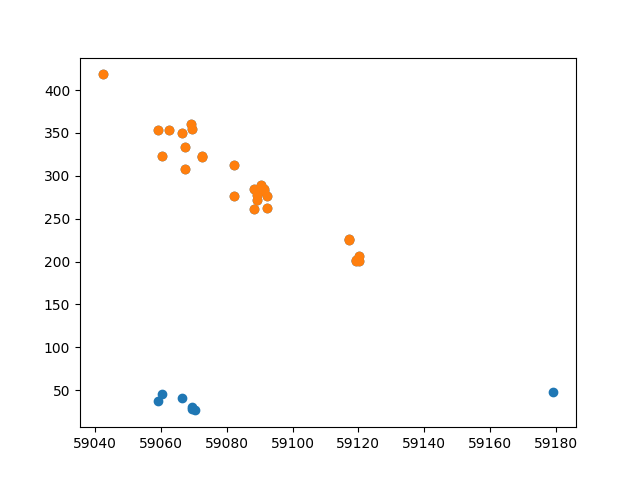

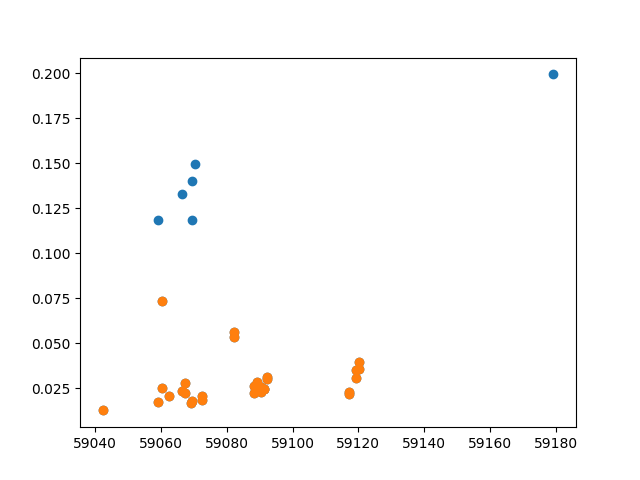

In [17]:
plt.figure()
plt.scatter(ztf_g_df['MJD'], ztf_g_df['Flux'])
plt.scatter(ztf_g_df['MJD'][ztf_g_df['d_Flux']/ztf_g_df['Flux'] < 0.07], ztf_g_df['Flux'][ztf_g_df['d_Flux']/ztf_g_df['Flux'] < 0.07])
plt.show()

plt.figure()
plt.scatter(ztf_g_df['MJD'], ztf_g_df['d_Flux']/ztf_g_df['Flux'])
plt.scatter(ztf_g_df['MJD'][ztf_g_df['d_Flux']/ztf_g_df['Flux'] < 0.1], 
            ztf_g_df['d_Flux'][ztf_g_df['d_Flux']/ztf_g_df['Flux'] < 0.1]/ztf_g_df['Flux'][ztf_g_df['d_Flux']/ztf_g_df['Flux'] < 0.1])
plt.show()

In [21]:
ztf_g_df[ztf_g_df['d_Mag'] > 0.07]

,MJD,Observatory,Filter,Svo_filter,Flux,d_Flux,Mag,d_Mag
2,59059.310857,ZTF,g,Palomar/ZTF.g,36.878182,4.360466,19.983076,0.128377
4,59060.362685,ZTF,g,Palomar/ZTF.g,46.125349,3.390705,19.740151,0.079813
7,59066.344016,ZTF,g,Palomar/ZTF.g,41.489136,5.514867,19.855164,0.144319
12,59069.369387,ZTF,g,Palomar/ZTF.g,28.519735,3.995430,20.262136,0.152105
13,59069.369849,ZTF,g,Palomar/ZTF.g,30.562640,3.622323,20.187023,0.128683
14,59070.394502,ZTF,g,Palomar/ZTF.g,26.472119,3.958024,20.343028,0.162336
35,59179.197303,ZTF,g,Palomar/ZTF.g,48.205795,9.606864,19.692252,0.216375
